Importing the sample dataset from UCI repos. 

In [126]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables.head()) 



{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [127]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [128]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(6497, 11)
(4872, 11)
(1625, 11)


Train and evaluate a Decision Tree Classifier.

In [100]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=20)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))



Decision Tree Classifier Accuracy: 0.5846153846153846
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.23      0.17      0.20        64
           5       0.68      0.65      0.66       549
           6       0.61      0.62      0.61       700
           7       0.46      0.52      0.49       251
           8       0.40      0.38      0.39        52
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1625
   macro avg       0.34      0.33      0.34      1625
weighted avg       0.58      0.58      0.58      1625

Confusion Matrix:
 [[  0   0   1   6   1   0   0]
 [  1  11  27  20   4   1   0]
 [  2  24 355 141  23   4   0]
 [  1  12 132 434 107  14   0]
 [  0   1   7 101 130  11   1]
 [  1   0   2  14  15  20   0]
 [  0   0   0   0   1   0   0]]


Train and evaluate a Random Forest Classifier. Need to reshape the y values using numpy .ravel().



In [129]:
# Reshape y_train and y_test using ravel()
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [130]:
rf = RandomForestClassifier(random_state=20)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.6726153846153846
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.86      0.09      0.17        64
           5       0.71      0.71      0.71       549
           6       0.64      0.78      0.70       700
           7       0.69      0.54      0.61       251
           8       1.00      0.31      0.47        52
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1625
   macro avg       0.56      0.35      0.38      1625
weighted avg       0.69      0.67      0.66      1625

Confusion Matrix:
 [[  0   0   3   5   0   0   0]
 [  0   6  33  25   0   0   0]
 [  0   1 392 153   3   0   0]
 [  0   0 116 543  41   0   0]
 [  0   0   6 109 136   0   0]
 [  0   0   0  19  17  16   0]
 [  0   0   0   0   1   0   0]]


Train and evaluate a Gradient Boosting Classifier.



In [131]:
# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=20)

# Train the model
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier Accuracy: 0.5956923076923077
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.67      0.09      0.16        64
           5       0.68      0.64      0.66       549
           6       0.56      0.74      0.64       700
           7       0.52      0.34      0.41       251
           8       0.62      0.10      0.17        52
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1625
   macro avg       0.44      0.27      0.29      1625
weighted avg       0.60      0.60      0.57      1625

Confusion Matrix:
 [[  0   0   4   4   0   0   0]
 [  0   6  33  25   0   0   0]
 [  3   2 351 187   6   0   0]
 [  1   1 122 521  51   3   1]
 [  0   0   6 160  85   0   0]
 [  0   0   0  28  19   5   0]
 [  0   0   0   0   1   0   0]]


Calculate Feature Importance


XGBoost Classifier Accuracy: 0.6807692307692308
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.64      0.16      0.25        58
           2       0.72      0.76      0.74       433
           3       0.66      0.74      0.70       560
           4       0.63      0.59      0.61       199
           5       0.82      0.32      0.46        44

    accuracy                           0.68      1300
   macro avg       0.58      0.43      0.46      1300
weighted avg       0.68      0.68      0.67      1300

XGBoost Classifier Accuracy: 0.6807692307692308
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.64      0.16      0.25        58
           2       0.72      0.76      0.74       433
           3       0.66      0.74      0.70       560
           4       0.63      0.59      0.6

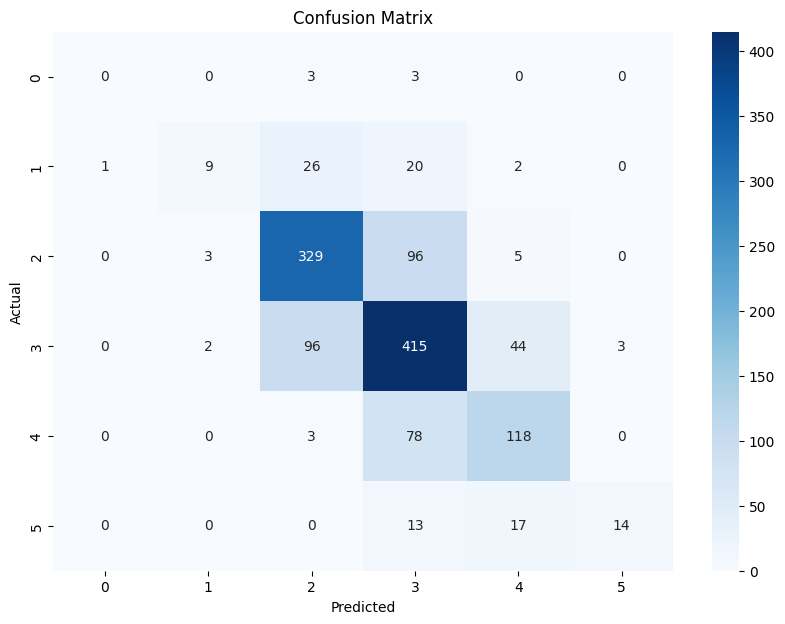

In [143]:
import xgboost as xgb

# Adjust the target variable for XGBoost to start from 0 instead of 3 (original values are 3, 4, 5, 6, 7, 8, 9)
y_adjusted = y - y.min()

X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.2, random_state=20)


# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',  # for multiclass classification
    num_class=10,               # number of classes in the target variable
    max_depth=8,                # maximum depth of the trees
    learning_rate=0.4,          # learning rate
    n_estimators=500,           # number of trees (boosting rounds)
    random_state=20
)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Evaluate the model
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot the confusion matrix 
plt.figure(figsize=(10, 7)) 
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [140]:
# Feature importance for Decision Tree
dt_feature_importance = dt.feature_importances_

# Feature importance for Random Forest
rf_feature_importance = rf.feature_importances_

# Feature importance for Gradient Boosting
gb_feature_importance = gb.feature_importances_

# Feature importance for XGBoost
xgb_feature_importance = xgb_clf.feature_importances_



Visualize Feature Importance

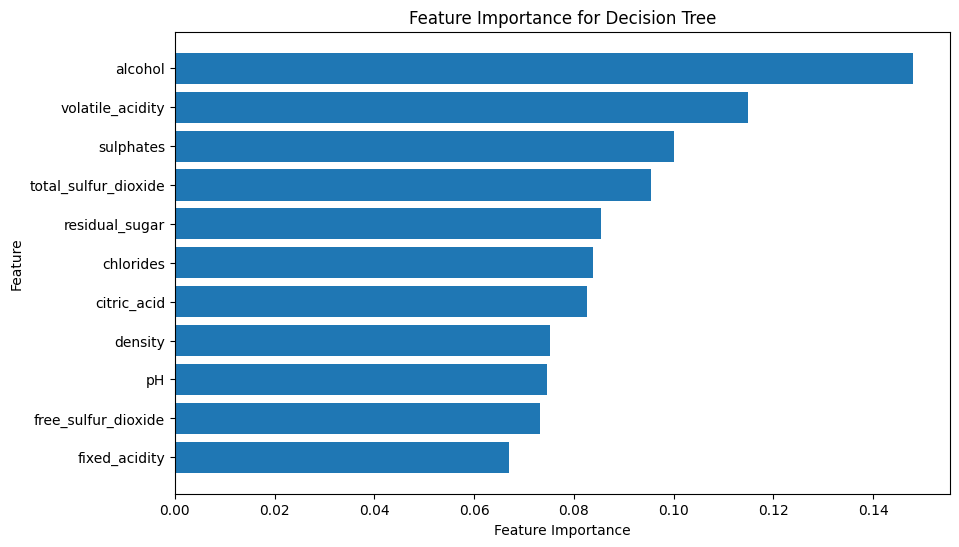

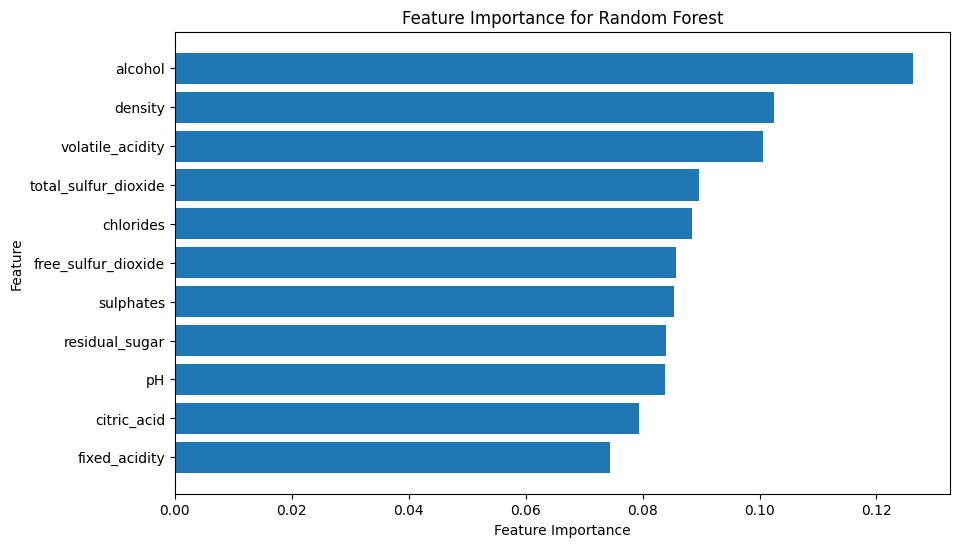

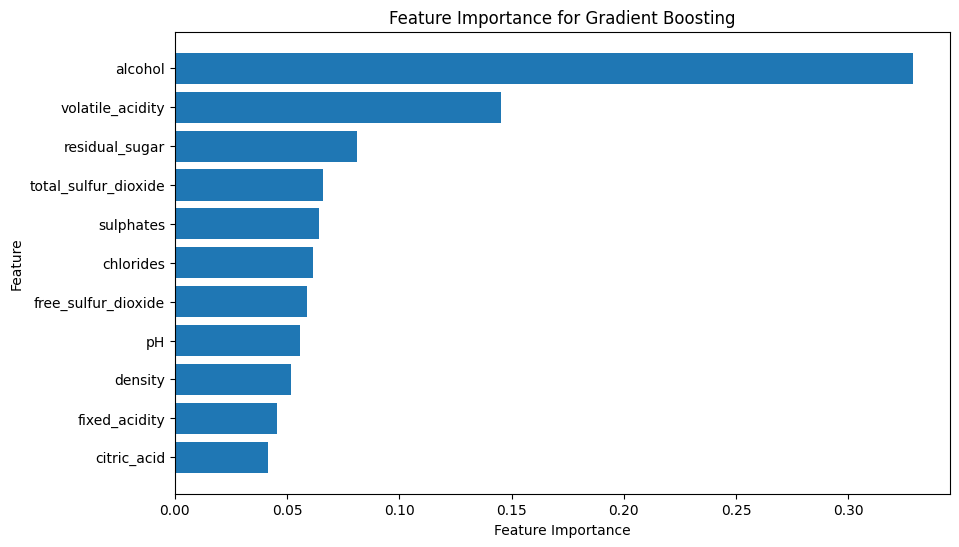

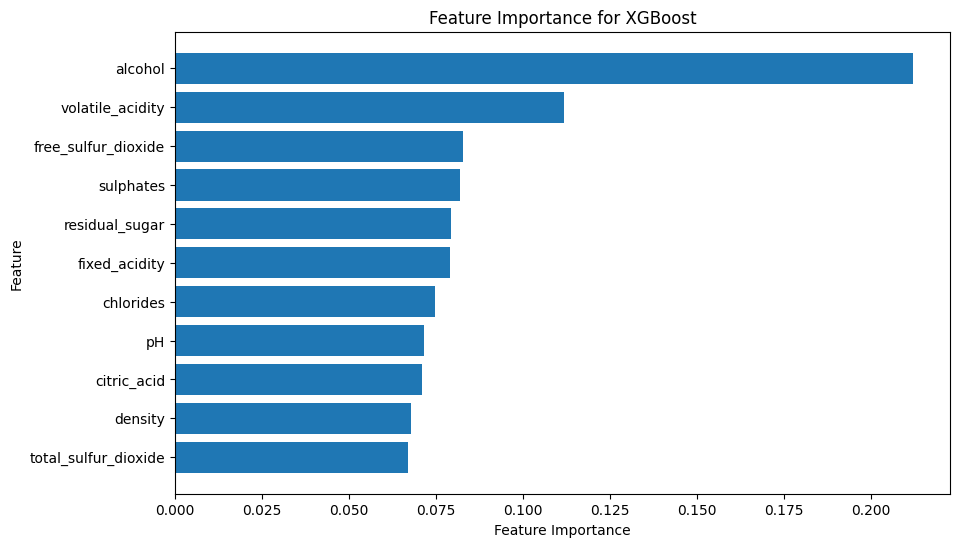

In [141]:
# Get feature names
feature_names = X_train.columns

# Function to plot feature importance
def plot_feature_importance(importance, names, model_type):
    # Create a DataFrame for plotting
    feature_importance = pd.DataFrame({'Feature': names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance for {model_type}')
    plt.gca().invert_yaxis()
    plt.show()

# Plot feature importance for each model
plot_feature_importance(dt_feature_importance, feature_names, 'Decision Tree')
plot_feature_importance(rf_feature_importance, feature_names, 'Random Forest')
plot_feature_importance(gb_feature_importance, feature_names, 'Gradient Boosting')
plot_feature_importance(xgb_feature_importance, feature_names, 'XGBoost')

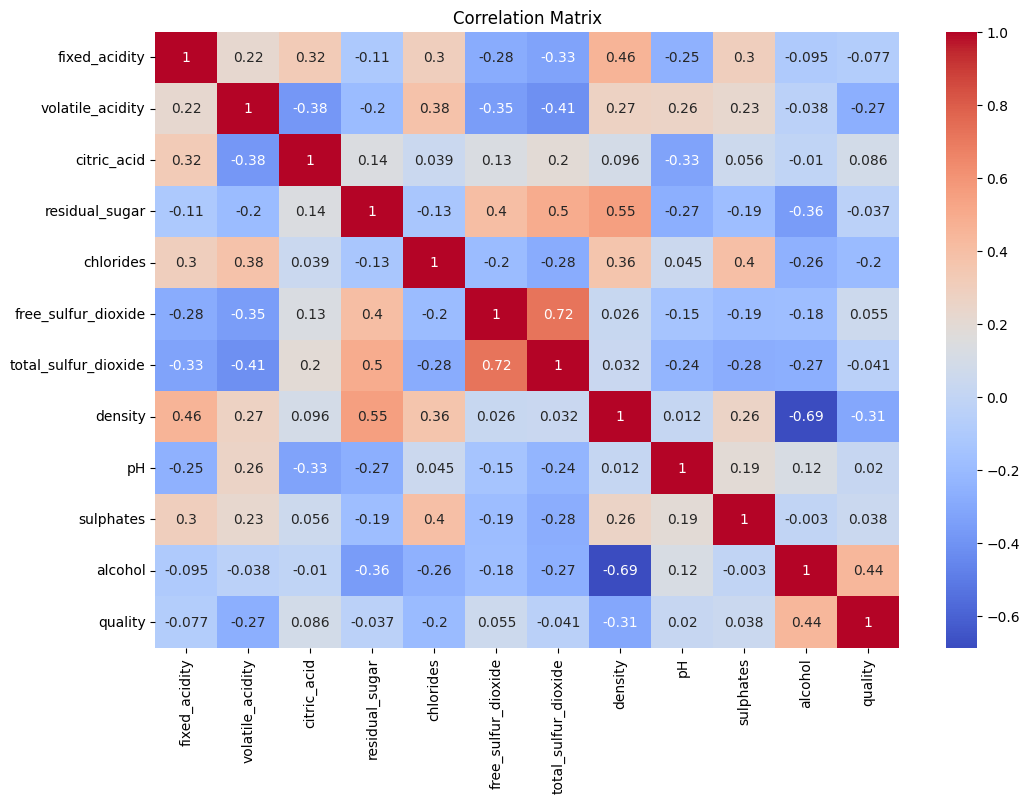

In [142]:

# Correlation analysis
corr_data =wine_quality.data.original.drop('color', axis=1)
correlation_matrix = corr_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

